In [7]:
%matplotlib inline

import numpy as np
from wfTel import LSSTFactory
import matplotlib.pyplot as plt
from collections import OrderedDict

In [8]:
norm = OrderedDict()

norm["M2 x"] = [-0.000118,   0.000118]
norm["M2 y"] = [-0.000118,   0.000118]
norm["M2 z"] = [-1.11e-05,   1.11e-05]
norm["M2 thx"] = [-1.76e-05,   1.76e-05]
norm["M2 thy"] = [-1.76e-05,   1.76e-05]
norm["camera x"] = [-0.00058,   0.00058]
norm["camera y"] = [-0.00058,     0.00058]
norm["camera z"] = [-1.07e-05,   5.39e-06]
norm["camera thx"] = [-4.2e-05,     4.2e-05]
norm["camera thy"] = [-4.2e-05,     4.2e-05]
norm["M1M3 zer 1"] = [-1.11e-07,   5.64e-08]
norm["M1M3 zer 2"] = [-4.24e-08,   4.24e-08]
norm["M1M3 zer 3"] = [-4.24e-08,   4.24e-08]
norm["M1M3 zer 4"] = [-6.5e-08,    6.5e-08]
norm["M1M3 zer 5"] = [-6.5e-08,    6.5e-08]
norm["M1M3 zer 6"] = [-4.59e-08,   4.59e-08]
norm["M1M3 zer 7"] = [-4.59e-08,   4.59e-08]
norm["M1M3 zer 8"] = [-1.3e-07,   6.62e-08]
norm["M1M3 zer 9"] = [-5.15e-08,   5.15e-08]
norm["M1M3 zer 10"] = [-5.15e-08,   5.15e-08]
norm["M1M3 zer 11"] = [-4.81e-08,   4.81e-08]
norm["M1M3 zer 12"] = [-4.81e-08,   4.81e-08]
norm["M1M3 zer 13"] = [-7.36e-08,   7.36e-08]
norm["M1M3 zer 14"] = [-7.36e-08,   7.36e-08]
norm["M1M3 zer 15"] = [-4.97e-08,   4.97e-08]
norm["M1M3 zer 16"] = [-4.97e-08,   4.97e-08]
norm["M1M3 zer 17"] = [-4.92e-08,   4.92e-08]
norm["M1M3 zer 18"] = [-4.92e-08,   4.92e-08]
norm["M1M3 zer 19"] = [-6.77e-08,   5.15e-08]
norm["M1M3 zer 20"] = [-5.13e-08,   5.13e-08]
norm["M2 zer 1"] = [-5.91e-08,   1.17e-07]
norm["M2 zer 2"] = [-6.89e-08,   6.89e-08]
norm["M2 zer 3"] = [-6.89e-08,   6.89e-08]
norm["M2 zer 4"] = [-7.64e-08,   7.64e-08]
norm["M2 zer 5"] = [-7.64e-08,   7.64e-08]
norm["M2 zer 6"] = [-7.06e-08,   7.06e-08]
norm["M2 zer 7"] = [-7.06e-08,   7.06e-08]
norm["M2 zer 8"] = [-6.28e-08,   7.04e-08]
norm["M2 zer 9"] = [-6.83e-08,   6.83e-08]
norm["M2 zer 10"] = [-6.83e-08,   6.83e-08]
norm["M2 zer 11"] = [-7.36e-08,   7.36e-08]
norm["M2 zer 12"] = [-7.36e-08,   7.36e-08]
norm["M2 zer 13"] = [-6.8e-08,    6.8e-08]
norm["M2 zer 14"] = [-6.8e-08,    6.8e-08]
norm["M2 zer 15"] = [-6.48e-08,   6.48e-08]
norm["M2 zer 16"] = [-6.48e-08,   6.48e-08]
norm["M2 zer 17"] = [-7.65e-08,   7.65e-08]
norm["M2 zer 18"] = [-7.65e-08,   7.65e-08]
norm["M2 zer 19"] = [-5.9e-08,   5.72e-08]
norm["M2 zer 20"] = [-6.57e-08,   6.57e-08]

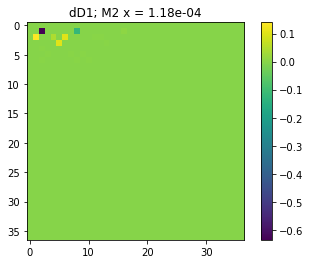

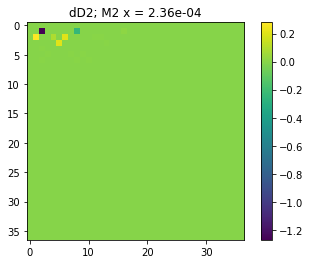

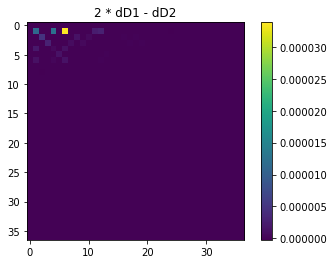

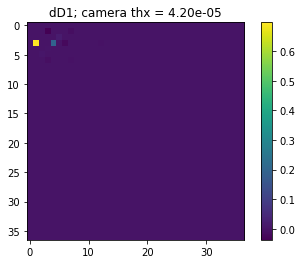

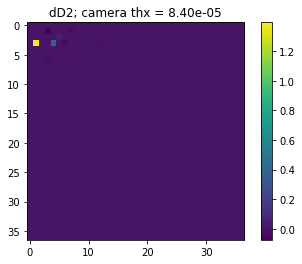

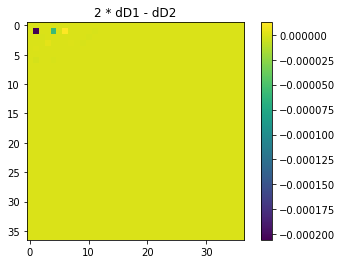

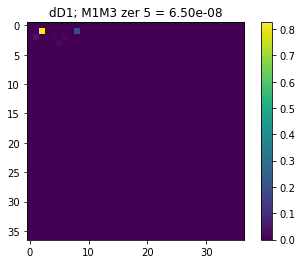

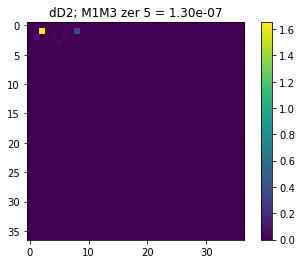

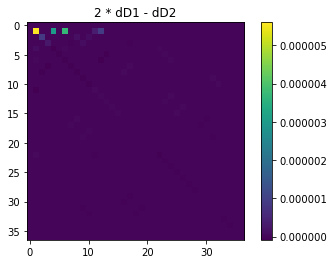

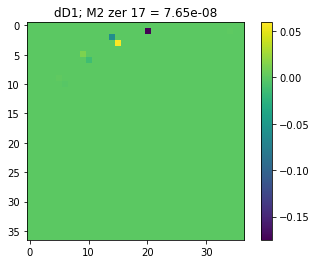

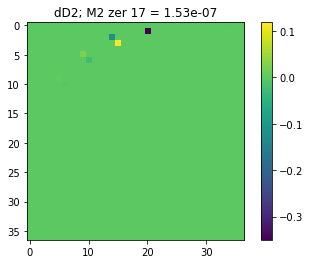

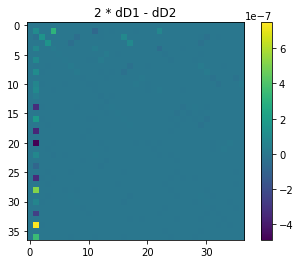

In [79]:
test = ['M2 x', 'camera thx', 'M1M3 zer 5', 'M2 zer 17']

factory = LSSTFactory('r')
dof = np.zeros(50)
visit = factory.make_visit_telescope(dof=dof)
D0 = visit.dz()

for t in test:
    dof1 = np.zeros(50)
    dof2 = np.zeros(50)

    idx = list(norm.keys()).index(t)

    dof1[idx] = norm[t][1]
    tel1 = factory.make_visit_telescope(dof=dof1)    
    D1 = tel1.dz()
    dD1 = D1 - D0
    
    dof2[idx] = 2 * norm[t][1]
    tel2 = factory.make_visit_telescope(dof=dof2)
    D2 = tel2.dz()
    dD2 = D2 - D0
    
    plt.figure()
    plt.title(f'dD1; {t} = {dof1[idx]:.2e}')
    plt.imshow(dD1)
    plt.colorbar()
    
    plt.figure()
    plt.title(f'dD2; {t} = {dof2[idx]:.2e}')
    plt.imshow(dD2)
    plt.colorbar()

    plt.figure()
    plt.title('2 * dD1 - dD2')
    plt.imshow(2 * dD1 - dD2)
    plt.colorbar()

# Fitting
- Set telescope state
- Take 10 points around the field, compute 
- Then for each zernike, fit zernikes

In [22]:
import numpy as np
from wfTel import LSSTFactory
from time import time

factory = LSSTFactory('r')
dof = np.zeros(50)
visit = factory.make_visit_telescope(dof=dof)

In [29]:
pos = np.random.uniform(-np.pi / 180, np.pi / 180, size=80).reshape(40,2) 

res = np.zeros((40,23))
for i in range(40):
    res[i] = visit.get_zernike(pos[i][0], pos[i][1], reference='chief')

0 1589947807.4531498
1 1589947807.4638667
2 1589947807.4733198
3 1589947807.4818075
4 1589947807.4898727
5 1589947807.4975765
6 1589947807.5049555
7 1589947807.512005
8 1589947807.5192285
9 1589947807.5259764
10 1589947807.5325782
11 1589947807.5388405
12 1589947807.5448608
13 1589947807.5508375
14 1589947807.5567994
15 1589947807.5624185
16 1589947807.5679736
17 1589947807.5733783
18 1589947807.5787725
19 1589947807.5832603
20 1589947807.587221
21 1589947807.591392
22 1589947807.5957801
23 1589947807.60008
24 1589947807.6044226
25 1589947807.6085312
26 1589947807.6125703
27 1589947807.616793
28 1589947807.62179
29 1589947807.6257377
30 1589947807.629732
31 1589947807.6341314
32 1589947807.6381385
33 1589947807.6425786
34 1589947807.6474712
35 1589947807.6518526
36 1589947807.6563592
37 1589947807.6612475
38 1589947807.6659806
39 1589947807.6703415


In [21]:
pos

array([[-0.00060809,  0.01064808],
       [ 0.01739029,  0.00637177],
       [ 0.01465107,  0.00838131],
       [-0.00070895,  0.00085459],
       [ 0.01421526,  0.00748645],
       [ 0.01357005, -0.00893424],
       [ 0.01631891,  0.01222853],
       [-0.00360341,  0.01127587],
       [-0.00621314,  0.01326363],
       [ 0.00773441, -0.00756651],
       [ 0.00173943,  0.00583108],
       [ 0.00828039, -0.00732593],
       [ 0.01591516, -0.0068197 ],
       [-0.01476505, -0.01604796],
       [-0.00663133, -0.00144112],
       [-0.01164358,  0.01631899],
       [ 0.01154151,  0.00916431],
       [-0.01118464,  0.01306861],
       [-0.01240842,  0.0065663 ],
       [ 0.0039096 , -0.01269951],
       [ 0.00731078,  0.01657428],
       [-0.00210761, -0.00637325],
       [ 0.00957343,  0.00500767],
       [-0.00622015,  0.01579838],
       [ 0.00692941, -0.00486523],
       [ 0.01172114, -0.01572315],
       [ 0.00347749, -0.01659555],
       [-0.008784  , -0.01566134],
       [ 0.00699669,

In [32]:
from galsim.zernike import zernikeBasis
basis = zernikeBasis(23, pos[:,0], pos[:,1], R_outer=np.pi / 180)
coefs, _, _, _ = np.linalg.lstsq(basis.T, res[:,5])

/labs/khatrilab/scottmk/Software/miniconda37/envs/core/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
coefs

array([ 0.00000000e+00,  1.04486659e-07,  4.47312492e-07, -1.26906968e-06,
       -5.22440892e-07,  1.07877067e-01,  6.70730421e-07, -7.55654974e-07,
       -3.68554629e-07,  1.01221762e-06, -6.24941677e-07,  4.55841208e-07,
        6.63524119e-07, -1.27486965e-02, -5.96263629e-07, -6.87486387e-07,
       -9.20969997e-08, -6.71007821e-07, -5.23414450e-07,  9.04910916e-07,
        1.38828538e-06,  2.60976322e-08, -5.03188894e-07,  5.85807292e-05])

In [34]:
from batoid.analysis import doubleZernike

In [37]:
dz = doubleZernike(visit., np.pi / 180, eps=0.61, wavelength=500e-9)

AttributeError: 'VisitTelescope' object has no attribute 'pupilSize'

In [36]:
dz

NameError: name 'dz' is not defined

In [41]:
import sys
import batoid

z = np.zeros(int(2e6))
rays = batoid.RayVector.fromArrays(z,z,z,z,z,z,z,z)
sys.getsizeof(rays)

56

In [42]:
sys.getsizeof(rays.x)

96

In [43]:
import sys

def get_size(obj, seen=None):
    """Recursively finds size of objects"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

In [44]:
get_size(rays)

612

In [45]:
8 * 4 * 2e7

640000000.0

In [47]:
2e7 * 4 * 8 / 1000 / 1000

640.0

In [48]:
!pwd

/labs/khatrilab/scottmk/david/wfsim
